In [1]:
pip install tensorflow numpy matplotlib scikit-learn


  Using cached tensorflow-2.16.1-cp39-cp39-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.16.1-cp39-cp39-win_amd64.whl (376.9 MB)
  Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached ml_dtypes-0.3.2-cp39-cp39-win_amd64.whl (127 kB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
  Using cached h5py-3.11.0-cp39-cp39-win_amd64.whl (3.0 MB)
  Using cached grpcio-1.64.1-cp39-cp39-win_amd64.whl (4.1 MB)
  Using cached rich-13.7.1-py3-none-any.whl (240 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
  Attempting uninstall: h5py
    Found existing installation: h5py 3.7.0
    Uninstalling h5py-3.7.0:
      Su

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np

# Charger les données CIFAR10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Définir les classes qui peuvent voler (0: avion, 2: oiseau)
can_fly = [0, 2]
# Définir les classes qui ne peuvent pas voler
cannot_fly = [1, 3, 4, 5, 6, 7, 8, 9]

# Créer des étiquettes binaires
y_train_binary = np.where(np.isin(y_train, can_fly), 1, 0)
y_test_binary = np.where(np.isin(y_test, can_fly), 1, 0)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 150s 1us/step


In [4]:
# Normaliser les images
x_train = x_train / 255.0
x_test = x_test / 255.0


## Définir l'architecture du CNN

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Construire le modèle CNN
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Classification binaire
])


## Compiler le modèle

In [7]:
# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


## Entraîner le modèle


In [8]:
# Entraîner le modèle
model.fit(x_train, y_train_binary, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.8026 - loss: 0.4747 - val_accuracy: 0.8519 - val_loss: 0.3594
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.8478 - loss: 0.3673 - val_accuracy: 0.8702 - val_loss: 0.3230
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.8696 - loss: 0.3279 - val_accuracy: 0.8702 - val_loss: 0.3137
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8776 - loss: 0.3038 - val_accuracy: 0.8734 - val_loss: 0.3088
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8874 - loss: 0.2791 - val_accuracy: 0.8891 - val_loss: 0.2788
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.8973 - loss: 0.2576 - val_accuracy: 0.8907 - val_loss: 0.2760
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9064 - loss: 0.2368 - val_accuracy: 0.8932 - val_loss: 0.2707
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9166 - loss: 0.2111 - 

## Évaluer le modèle

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8846 - loss: 0.2957
Accuracy: 0.8845000267028809
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      8000
           1       0.72      0.69      0.70      2000

    accuracy                           0.88     10000
   macro avg       0.82      0.81      0.82     10000
weighted avg       0.88      0.88      0.88     10000

[[7473  527]
 [ 628 1372]]


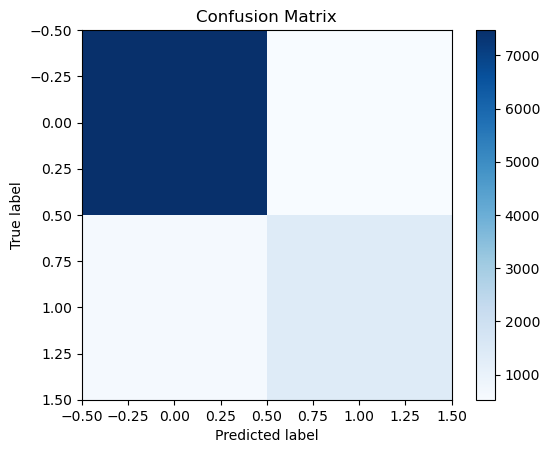

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Évaluer le modèle
loss, accuracy = model.evaluate(x_test, y_test_binary)
print(f'Accuracy: {accuracy}')

# Prédire les étiquettes pour les données de test
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Calculer et afficher les métriques
print(classification_report(y_test_binary, y_pred))
cm = confusion_matrix(y_test_binary, y_pred)
print(cm)

# Afficher la matrice de confusion
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


## Overall Accuracy: 88.45%
Classification Report:
Class 0 (Cannot fly): Precision of 0.92, Recall of 0.93, F1-score of 0.93
Class 1 (Can fly): Precision of 0.72, Recall of 0.69, F1-score of 0.70
Confusion Matrix:
Class 0: 7473 true negatives, 527 false positives
Class 1: 628 false negatives, 1372 true positives



These results indicate that the model performs well in distinguishing between flying and non-flying objects, although the performance is slightly better for the majority class (cannot fly).